In [1]:
from __future__ import annotations

In [2]:
from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [104]:
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_classification, fetch_openml

In [4]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('dark')
sns.set(rc={'figure.figsize': (10, 10), 'axes.grid': False})

In [5]:
X, y = make_regression(n_samples=1000, n_features=5, n_targets=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
inputs = tf.keras.layers.Input((X.shape[-1], ), name='inputs', dtype=tf.float32)

x = tf.keras.layers.Dense(10, name='dense_1', activation='relu', use_bias=True)(inputs)
x = tf.keras.layers.Dense(5, name='dense_2', activation='relu')(x)
x = tf.keras.layers.Dense(2, name='output')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=x, name='regression_model')

2022-05-31 13:46:40.263168: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-31 13:46:40.638791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8417 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:c1:00.0, compute capability: 7.5
2022-05-31 13:46:40.639091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.summary()

Model: "regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 5)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 output (Dense)              (None, 2)                 12        
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


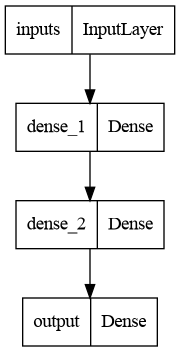

In [14]:
tf.keras.utils.plot_model(model)

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((X.shape[-1], ), name='inputs', dtype=tf.float32),
    tf.keras.layers.Dense(10, name='dense_1', activation='relu', use_bias=True),
    tf.keras.layers.Dense(5, name='dense_2', activation='relu'),
    tf.keras.layers.Dense(2, name='output')
], name='sequential_regression_model')

In [17]:
model.summary()

Model: "sequential_regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 output (Dense)              (None, 2)                 12        
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


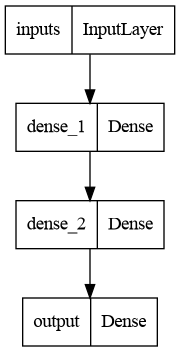

In [18]:
tf.keras.utils.plot_model(model)

In [76]:
model.compile(loss='mse', optimizer='adam')

In [77]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('logs/models/{epoch}', save_best_only=True, save_freq='epoch'),
]

In [60]:
help(tf.keras.callbacks.EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [59]:
dir(tf.keras.callbacks)

['BackupAndRestore',
 'BaseLogger',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'EarlyStopping',
 'History',
 'LambdaCallback',
 'LearningRateScheduler',
 'ModelCheckpoint',
 'ProgbarLogger',
 'ReduceLROnPlateau',
 'RemoteMonitor',
 'TensorBoard',
 'TerminateOnNaN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

In [55]:
model.fit(X_train, y_train, epochs=500, initial_epoch=0, verbose=1, validation_data=(X_test, y_test), batch_size=32, callbacks=callbacks)

Epoch 1/500
24/24 [==============================] - 2s 74ms/step - loss: 16838.9277 - val_loss: 15162.5020
Epoch 2/500
24/24 [==============================] - 1s 60ms/step - loss: 16821.8223 - val_loss: 15147.9717
Epoch 3/500
24/24 [==============================] - 2s 104ms/step - loss: 16805.1035 - val_loss: 15131.8672
Epoch 4/500
24/24 [==============================] - 2s 103ms/step - loss: 16786.8340 - val_loss: 15111.7246
Epoch 5/500
24/24 [==============================] - 2s 108ms/step - loss: 16762.7422 - val_loss: 15086.1523
Epoch 6/500
24/24 [==============================] - 3s 142ms/step - loss: 16732.2383 - val_loss: 15052.5332
Epoch 7/500
24/24 [==============================] - 1s 61ms/step - loss: 16693.6328 - val_loss: 15009.1797
Epoch 8/500
24/24 [==============================] - 2s 67ms/step - loss: 16643.8340 - val_loss: 14958.0449
Epoch 9/500
24/24 [==============================] - 2s 96ms/step - loss: 16583.1289 - val_loss: 14893.0479
Epoch 10/500
24/24 [====

20/24 [========================>.....] - ETA: 0s - loss: 7094.8530 

KeyboardInterrupt: 

In [32]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4777


0.47773268818855286

In [33]:
pred = model.predict(X_test)

In [37]:
tf.keras.models.save_model(model, 'model')

2022-05-31 13:59:14.981666: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets


In [39]:
model.save('model.hdf5', save_format='h5')

In [56]:
model = tf.keras.models.load_model('model')

In [58]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.4777


0.47773268818855286

In [62]:
class Dataset(tf.keras.utils.Sequence):
    
    def __init__(self):
        pass
    
    def __len__(self):
        pass
    
    def __getitem__(self, index):
        pass

In [63]:
X_train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)

In [66]:
X_train_dataset = tf.data.Dataset.map(X_train_dataset, lambda x: x * 2)

In [70]:
train_dataset = tf.data.Dataset.zip((X_train_dataset, y_train_dataset))

In [71]:
train_dataset

<ZipDataset element_spec=(TensorSpec(shape=(5,), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [72]:
train_dataset = tf.data.Dataset.batch(train_dataset, 32)

In [73]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, 2), dtype=tf.float64, name=None))>

In [74]:
dir(tf.data.Dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__annotations__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_get_legacy_saved_model_children',
 '_graph',
 '

In [ ]:
tf.data.Dataset.skip(train_dataset, 5)

In [78]:
model.fit(train_dataset, epochs=500, initial_epoch=0, verbose=1, validation_data=(X_test, y_test), batch_size=32, callbacks=callbacks)

Epoch 1/500
24/24 [==============================] - 1s 20ms/step - loss: 16831.1230 - val_loss: 15159.1318
Epoch 2/500
24/24 [==============================] - 0s 18ms/step - loss: 16784.9980 - val_loss: 15134.0498
Epoch 3/500
24/24 [==============================] - 0s 19ms/step - loss: 16734.4316 - val_loss: 15106.2559
Epoch 4/500
24/24 [==============================] - 0s 17ms/step - loss: 16677.8184 - val_loss: 15074.4639
Epoch 5/500
24/24 [==============================] - 0s 19ms/step - loss: 16611.4590 - val_loss: 15036.3184
Epoch 6/500
24/24 [==============================] - 0s 18ms/step - loss: 16533.4766 - val_loss: 14991.2549
Epoch 7/500
24/24 [==============================] - 0s 17ms/step - loss: 16441.3223 - val_loss: 14937.3145
Epoch 8/500
24/24 [==============================] - 0s 18ms/step - loss: 16331.4297 - val_loss: 14871.8223
Epoch 9/500
17/24 [====================>.........] - ETA: 0s - loss: 16772.5781

KeyboardInterrupt: 

In [81]:
X, y = make_classification(n_samples=10000, n_features=25, n_informative=25, n_redundant=0, n_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [126]:
inputs = tf.keras.layers.Input((25, ), name='inputs')

x = tf.keras.layers.Dense(50, activation='selu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(30, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(20, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=x)

In [119]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 25)]         0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 30)           780         ['inputs[0][0]']                 
                                                                                                  
 dense_21 (Dense)               (None, 20)           620         ['dense_20[0][0]']               
                                                                                                  
 dense_22 (Dense)               (None, 20)           620         ['dense_20[0][0]']               
                                                                                            

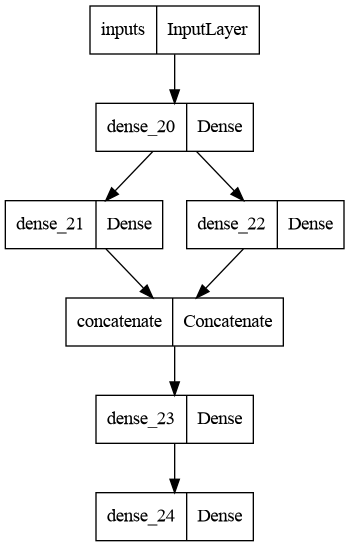

In [120]:
tf.keras.utils.plot_model(model)

In [127]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy']
)

In [87]:
X_train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)

In [88]:
train_dataset = tf.data.Dataset.zip((X_train_dataset, y_train_dataset))
train_dataset = train_dataset.batch(256)

In [89]:
X_test_dataset = tf.data.Dataset.from_tensor_slices(X_test)
y_test_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [90]:
test_dataset = tf.data.Dataset.zip((X_test_dataset, y_test_dataset))
test_dataset = test_dataset.batch(256)

In [128]:
model.fit(train_dataset, epochs=200, validation_data=test_dataset, verbose=1)

Epoch 1/200
30/30 [==============================] - 1s 14ms/step - loss: 2.6245 - accuracy: 0.1440 - val_loss: 2.3373 - val_accuracy: 0.2136
Epoch 2/200
30/30 [==============================] - 0s 10ms/step - loss: 2.2831 - accuracy: 0.1997 - val_loss: 2.0326 - val_accuracy: 0.2904
Epoch 3/200
30/30 [==============================] - 0s 10ms/step - loss: 2.1479 - accuracy: 0.2307 - val_loss: 1.9093 - val_accuracy: 0.3272
Epoch 4/200
30/30 [==============================] - 0s 10ms/step - loss: 2.0690 - accuracy: 0.2625 - val_loss: 1.8363 - val_accuracy: 0.3560
Epoch 5/200
30/30 [==============================] - 0s 10ms/step - loss: 2.0040 - accuracy: 0.2876 - val_loss: 1.7889 - val_accuracy: 0.3744
Epoch 6/200
30/30 [==============================] - 0s 10ms/step - loss: 1.9451 - accuracy: 0.3047 - val_loss: 1.7508 - val_accuracy: 0.3936
Epoch 7/200
30/30 [==============================] - 0s 10ms/step - loss: 1.9124 - accuracy: 0.3284 - val_loss: 1.7196 - val_accuracy: 0.4040
Epoch 

30/30 [==============================] - 1s 21ms/step - loss: 1.3741 - accuracy: 0.5203 - val_loss: 1.1155 - val_accuracy: 0.6324
Epoch 59/200
30/30 [==============================] - 1s 21ms/step - loss: 1.3784 - accuracy: 0.5212 - val_loss: 1.1085 - val_accuracy: 0.6356
Epoch 60/200
30/30 [==============================] - 1s 24ms/step - loss: 1.3778 - accuracy: 0.5327 - val_loss: 1.1045 - val_accuracy: 0.6368
Epoch 61/200
30/30 [==============================] - 1s 22ms/step - loss: 1.3650 - accuracy: 0.5269 - val_loss: 1.0962 - val_accuracy: 0.6368
Epoch 62/200
30/30 [==============================] - 1s 23ms/step - loss: 1.3671 - accuracy: 0.5264 - val_loss: 1.0938 - val_accuracy: 0.6444
Epoch 63/200
30/30 [==============================] - 1s 23ms/step - loss: 1.3542 - accuracy: 0.5281 - val_loss: 1.0886 - val_accuracy: 0.6432
Epoch 64/200
30/30 [==============================] - 1s 24ms/step - loss: 1.3607 - accuracy: 0.5244 - val_loss: 1.0839 - val_accuracy: 0.6452
Epoch 65/200

30/30 [==============================] - 0s 10ms/step - loss: 1.1971 - accuracy: 0.5911 - val_loss: 0.9069 - val_accuracy: 0.7128
Epoch 116/200
30/30 [==============================] - 0s 10ms/step - loss: 1.2077 - accuracy: 0.5828 - val_loss: 0.9057 - val_accuracy: 0.7092
Epoch 117/200
30/30 [==============================] - 0s 9ms/step - loss: 1.1904 - accuracy: 0.5839 - val_loss: 0.9035 - val_accuracy: 0.7120
Epoch 118/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1941 - accuracy: 0.5849 - val_loss: 0.9021 - val_accuracy: 0.7092
Epoch 119/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1922 - accuracy: 0.5893 - val_loss: 0.8975 - val_accuracy: 0.7084
Epoch 120/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1917 - accuracy: 0.5903 - val_loss: 0.8947 - val_accuracy: 0.7140
Epoch 121/200
30/30 [==============================] - 0s 10ms/step - loss: 1.2020 - accuracy: 0.5749 - val_loss: 0.8910 - val_accuracy: 0.7148
Epoch 1

30/30 [==============================] - 0s 10ms/step - loss: 1.1144 - accuracy: 0.6199 - val_loss: 0.8303 - val_accuracy: 0.7292
Epoch 173/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1341 - accuracy: 0.6107 - val_loss: 0.8300 - val_accuracy: 0.7316
Epoch 174/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1048 - accuracy: 0.6259 - val_loss: 0.8311 - val_accuracy: 0.7304
Epoch 175/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1223 - accuracy: 0.6169 - val_loss: 0.8274 - val_accuracy: 0.7312
Epoch 176/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1226 - accuracy: 0.6207 - val_loss: 0.8239 - val_accuracy: 0.7340
Epoch 177/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1136 - accuracy: 0.6212 - val_loss: 0.8236 - val_accuracy: 0.7360
Epoch 178/200
30/30 [==============================] - 0s 10ms/step - loss: 1.1146 - accuracy: 0.6196 - val_loss: 0.8236 - val_accuracy: 0.7340
Epoch 